# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Coleta de dados

In [2]:
data = pd.read_csv('../data/processed/preprocessingTEC.csv')
data

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,3600,Evadidos,64095768,não declarada,2015-02-19,2019-02-19,15 a 19 anos,1.160,19.0,IFSUL,2019-07-01,Região Sul,"0<RFP<=0,5",Feminino,Matutino,RS,Campus Camaquã
1,3600,Concluintes,64094201,não declarada,2015-02-19,2019-02-19,20 a 24 anos,1.160,20.0,IFSUL,2019-08-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
2,3600,Concluintes,64094245,não declarada,2015-02-19,2019-02-19,15 a 19 anos,1.160,18.0,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
3,3600,Concluintes,64096104,não declarada,2015-02-19,2019-02-19,15 a 19 anos,1.160,19.0,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
4,3600,Concluintes,64095758,não declarada,2015-02-19,2019-02-19,20 a 24 anos,1.160,20.0,IFSUL,2019-03-01,Região Sul,"0,5<RFP<=1,0",Feminino,Matutino,RS,Campus Camaquã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166182,4025,Evadidos,72254964,parda,2017-02-22,2020-12-29,20 a 24 anos,1.120,20.0,IFPE,2021-12-30,Região Nordeste,Não declarada,Masculino,Vespertino,PE,Campus Recife
166183,3483,Concluintes,84665427,parda,2018-02-05,2020-12-22,15 a 19 anos,1.094,18.0,IFMA,2021-03-01,Região Nordeste,Não declarada,Masculino,Vespertino,MA,Campus São João dos Patos
166184,3730,Concluintes,84431051,parda,2018-03-01,2020-12-18,15 a 19 anos,1.016,18.0,IFBA,2021-12-01,Região Nordeste,Não declarada,Masculino,Vespertino,BA,Campus Valença Tento
166185,3780,Concluintes,102544908,parda,2016-07-18,2020-07-17,20 a 24 anos,1.053,21.0,IFBA,2021-03-01,Região Nordeste,Não declarada,Masculino,Vespertino,BA,Campus Santo Amaro


## 2. Descrição dos dados





### 2.1. Dicionário de dados

In [4]:
dicionario = pd.read_csv('../data/external/dicionario.csv', sep=',')
dicionario

,Variável,Significado,Tipo,Subtipo
0,Carga Horária,Carga horária do ciclo de matrícula.,Quantitativa,Discreta
1,Categoria da Situação,"Situações de matrícula: concluintes, em curso ...",Qualitativa,Nominal
2,Código da Matrícula,Código da matrícula.,Quantitativa,Discreta
3,Cor/Raça,Cor/Raça do aluno.,Qualitativa,Nominal
4,Data de Início do Ciclo,Data de início do ciclo de matrícula.,Quantitativa,Discreta
5,Data de Fim Previsto do Ciclo,Data prevista para o final do ciclo de matrícula.,Quantitativa,Discreta
6,Faixa Etária,Agrupamento baseado na idade dos estudantes.,Qualitativa,Ordinal
7,Fator Esforço Curso,Ajusta a contagem de matrículas-equivalentes p...,Quantitativa,Continua
8,Idade,Idade do estudante.,Quantitativa,Discreta
9,Instituição,Sigla da Instituição.,Qualitativa,Nominal


In [5]:
data.select_dtypes(include='object')

,Categoria da Situação,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
0,Evadidos,não declarada,2015-02-19,2019-02-19,15 a 19 anos,IFSUL,2019-07-01,Região Sul,"0<RFP<=0,5",Feminino,Matutino,RS,Campus Camaquã
1,Concluintes,não declarada,2015-02-19,2019-02-19,20 a 24 anos,IFSUL,2019-08-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
2,Concluintes,não declarada,2015-02-19,2019-02-19,15 a 19 anos,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
3,Concluintes,não declarada,2015-02-19,2019-02-19,15 a 19 anos,IFSUL,2019-04-01,Região Sul,Não declarada,Feminino,Matutino,RS,Campus Camaquã
4,Concluintes,não declarada,2015-02-19,2019-02-19,20 a 24 anos,IFSUL,2019-03-01,Região Sul,"0,5<RFP<=1,0",Feminino,Matutino,RS,Campus Camaquã
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166182,Evadidos,parda,2017-02-22,2020-12-29,20 a 24 anos,IFPE,2021-12-30,Região Nordeste,Não declarada,Masculino,Vespertino,PE,Campus Recife
166183,Concluintes,parda,2018-02-05,2020-12-22,15 a 19 anos,IFMA,2021-03-01,Região Nordeste,Não declarada,Masculino,Vespertino,MA,Campus São João dos Patos
166184,Concluintes,parda,2018-03-01,2020-12-18,15 a 19 anos,IFBA,2021-12-01,Região Nordeste,Não declarada,Masculino,Vespertino,BA,Campus Valença Tento
166185,Concluintes,parda,2016-07-18,2020-07-17,20 a 24 anos,IFBA,2021-03-01,Região Nordeste,Não declarada,Masculino,Vespertino,BA,Campus Santo Amaro


In [6]:
data ['UF'].unique()

array(['RS', 'AL', 'PR', 'MT', 'BA', 'AP', 'RN', 'RJ', 'SP', 'DF', 'PE',
       'TO', 'ES', 'AM', 'MG', 'SC', 'RR', 'GO', 'MA', 'CE', 'PB', 'PI',
       'PA', 'SE', 'MS', 'RO', 'AC'], dtype=object)

In [7]:
categorica = data.select_dtypes(include='object')

In [9]:
numerica = data.select_dtypes(exclude='object')

## 3. Perguntas de partida e hipóteses

### Qual a distribuição dos dados (variável por variável)?

In [10]:
data.describe(include='all')

,Carga Horária,Categoria da Situação,Código da Matrícula,Cor/Raça,Data de Início do Ciclo,Data de Fim Previsto do Ciclo,Faixa Etária,Fator Esforço Curso,Idade,Instituição,Mês de Ocorrência da Situação,Região,Renda Familiar,Sexo,Turno,UF,Unidade de Ensino
count,166187.000000,166187,1.661870e+05,166187,166187,166187,166187,166187.000000,166187.000000,166187,166187,166187,166187,166187,166187,166187,166187
unique,NaN,2,NaN,6,955,1184,12,NaN,NaN,51,508,5,7,3,5,27,552
top,NaN,Concluintes,NaN,parda,2018-02-05,2019-12-20,15 a 19 anos,NaN,NaN,IFRN,2019-12-01,Região Nordeste,Não declarada,Masculino,Integral,MG,Unidade Belo Horizonte
freq,NaN,114448,NaN,63725,12967,13735,130200,NaN,NaN,8731,25244,54362,61290,86384,91355,19064,1911
mean,3777.953113,NaN,7.719307e+07,NaN,NaN,NaN,NaN,1.156174,18.639190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,524.051373,NaN,1.095174e+07,NaN,NaN,NaN,NaN,0.101880,2.168813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,800.000000,NaN,3.410000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3467.000000,NaN,6.734609e+07,NaN,NaN,NaN,NaN,1.053000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3743.000000,NaN,7.250287e+07,NaN,NaN,NaN,NaN,1.183000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4040.000000,NaN,8.554953e+07,NaN,NaN,NaN,NaN,1.250000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data ['UF'].unique()

array(['RS', 'AL', 'PR', 'MT', 'BA', 'AP', 'RN', 'RJ', 'SP', 'DF', 'PE',
       'TO', 'ES', 'AM', 'MG', 'SC', 'RR', 'GO', 'MA', 'CE', 'PB', 'PI',
       'PA', 'SE', 'MS', 'RO', 'AC'], dtype=object)

##### Distribuição das variáveis qualitativas

In [12]:
sns.set_theme(style="whitegrid")

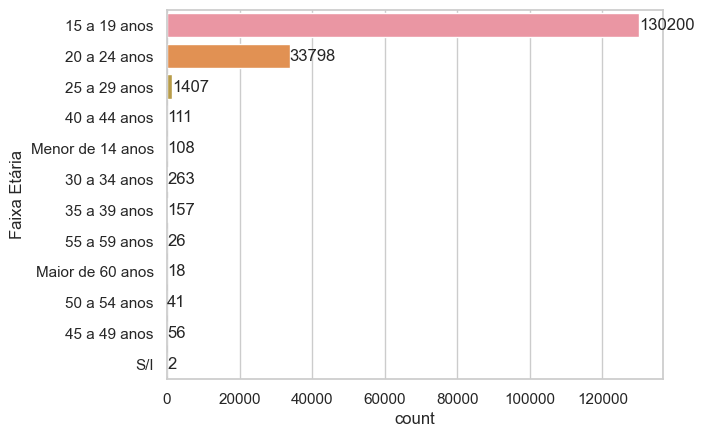

In [13]:
ax= sns.countplot(categorica,y='Faixa Etária')
ax.bar_label(ax.containers[0])
plt.show()

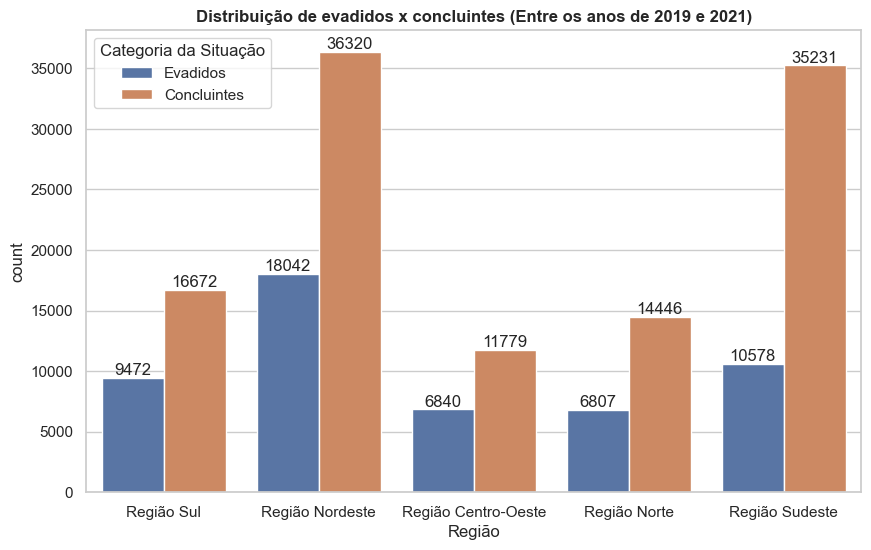

In [24]:
plt.figure(figsize=(10, 6))
ax= sns.countplot(categorica,x='Região',hue='Categoria da Situação')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Distribuição de evadidos x concluintes (Entre os anos de 2019 e 2021)",
          fontweight='bold')
plt.show()

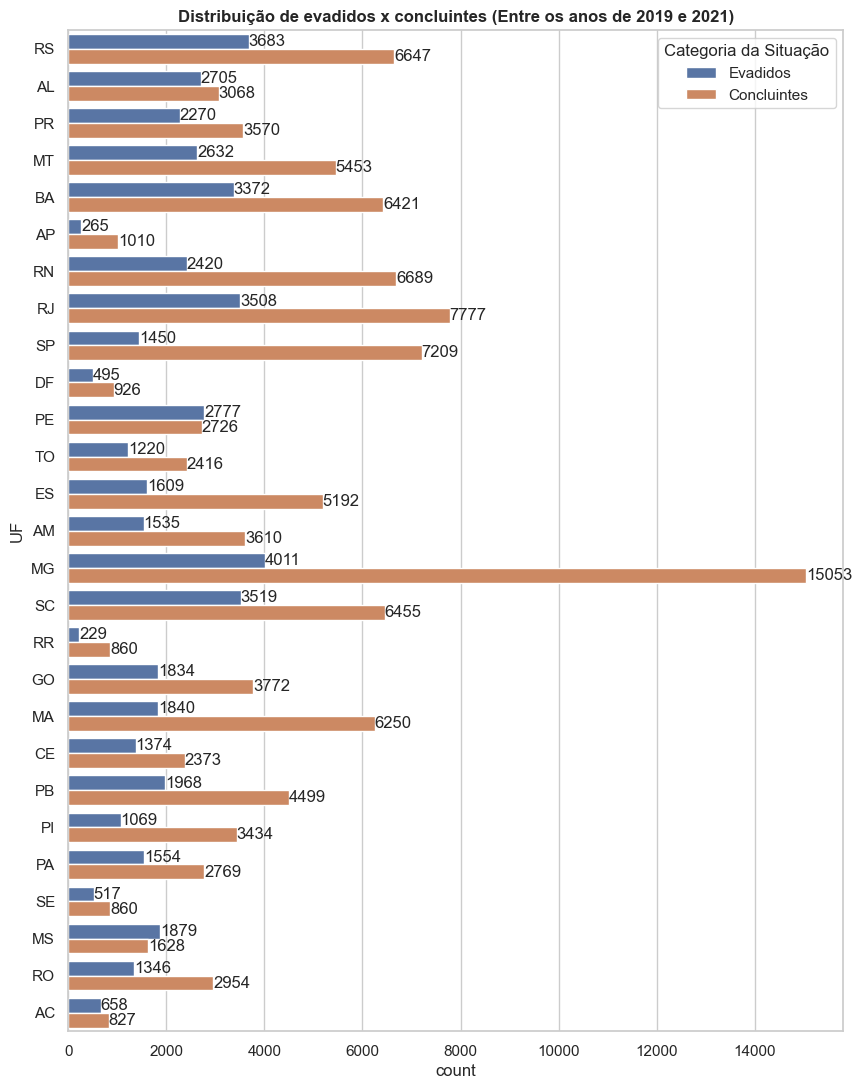

In [30]:
plt.figure(figsize=(10, 13))
ax= sns.countplot(categorica,y='UF',hue='Categoria da Situação')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Distribuição de evadidos x concluintes (Entre os anos de 2019 e 2021)",
          fontweight='bold')
plt.show()

## 4. Percepções


## 5. Observação